In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()
#If there were duplicates#
## DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False) ##

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
print("Categories in 'gender' variable:   " ,end = " ")
print(df["gender"].unique())
print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df["race_ethnicity"].unique())
print("Categories in 'parental_level_of_education' variable: ", end = "")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable: ", end = "")
print(df["lunch"].unique())
print("Categories in 'test_preparation_course' variable: ", end = "")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [22]:
#Define Numerical & Categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {} ".format(len(numeric_features), numeric_features))
print("We have {} categorical features : {} ".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [27]:
df['total_score'] = df['math_score'] + df['reading_score']+ df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Math: {math_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [30]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_les_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Math: {math_les_20}")

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


Conclusion after Exploration:

We can conclude students BEST did in Reading Section 17 full marks and only 1 student under 20.

We can conclude students WORST did in Math Section 7 full marks and 4 students under 20.


##############################################################################################

Visualization: Parental Level of Education and Average Score of students

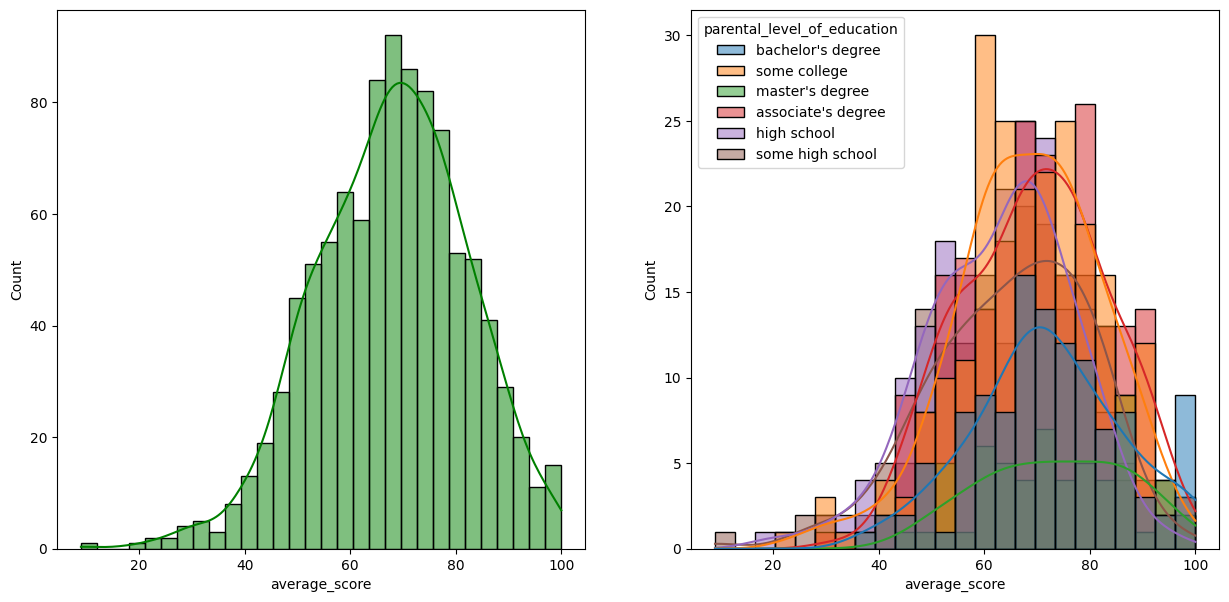

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.show()

Students' Performance based on Gender:

Conclusion: Female students are performing better


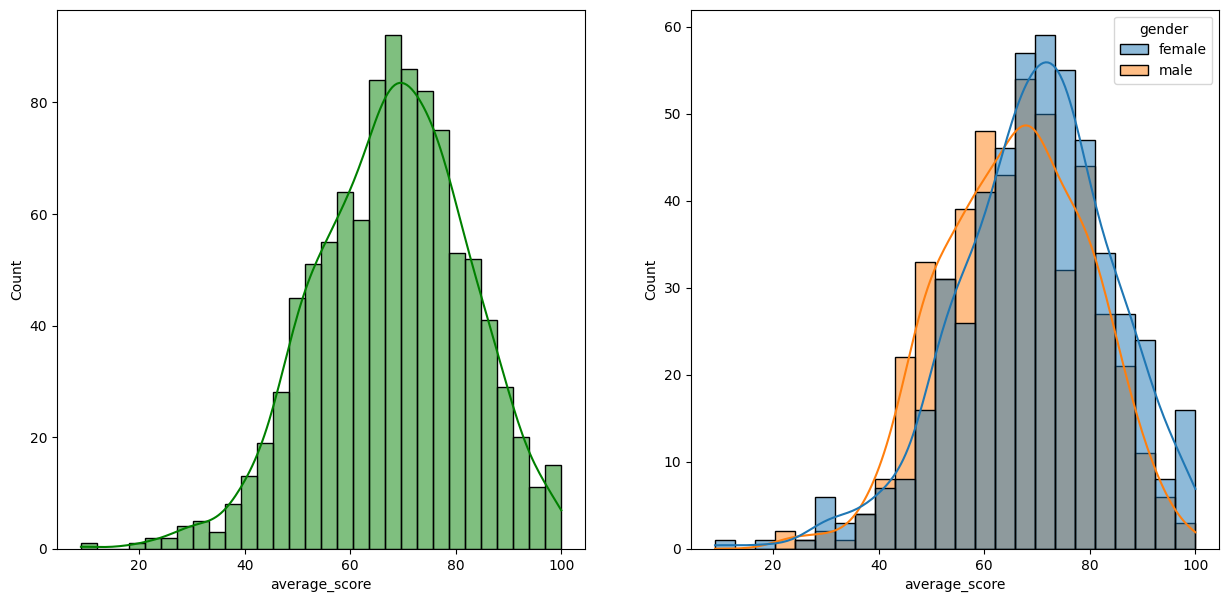

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'average_score', kde = True, hue = 'gender')
plt.show()